<h1>McDonald's menu Data Analysis</h1>

- Loading required libraries

In [1]:
import ibm_db
import pandas
import ibm_db_dbi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pandas_profiling as pp

- Importing warnings library to ignore warning

In [2]:
import warnings
warnings.filterwarnings('ignore')

- Connecting Host Details

In [3]:
dsn_hostname = 'dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net'
dsn_uid = "hsr89882"
dsn_pwd = "ln+t4bgl1l2fv55t"
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"
dsn_port = "50000"
dsn_protocol = "TCPIP"

- Creating connection to connect database

In [4]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=hsr89882;PWD=ln+t4bgl1l2fv55t;


- Trying to connect database

In [5]:
try:
    conn=ibm_db.connect(dsn,"","")
    print("connected to database")
except:
    print("Unable to connect")

connected to database


- Fetching the data from the table and closing the database connection

In [6]:
pconn = ibm_db_dbi.Connection(conn)
data = pandas.read_sql('SELECT * FROM McDonald', pconn)
ibm_db.close(conn)
data.head()

,Category,Item,Serving_Size,Calories,Calories_from_Fat,Total_Fat,Total_Fat____Daily_Value_,Saturated_Fat,Saturated_Fat____Daily_Value_,Trans_Fat,...,Carbohydrates,Carbohydrates____Daily_Value_,Dietary_Fiber,Dietary_Fiber____Daily_Value_,Sugars,Protein,Vitamin_A____Daily_Value_,Vitamin_C____Daily_Value_,Calcium____Daily_Value_,Iron____Daily_Value_
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


- Checking the size of the data

In [7]:
data.shape

(260, 24)

- Obtaining the basic statistics of the data

In [8]:
data.describe(include='all')

,Category,Item,Serving_Size,Calories,Calories_from_Fat,Total_Fat,Total_Fat____Daily_Value_,Saturated_Fat,Saturated_Fat____Daily_Value_,Trans_Fat,...,Carbohydrates,Carbohydrates____Daily_Value_,Dietary_Fiber,Dietary_Fiber____Daily_Value_,Sugars,Protein,Vitamin_A____Daily_Value_,Vitamin_C____Daily_Value_,Calcium____Daily_Value_,Iron____Daily_Value_
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,McDouble,16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


- Scatterplot representation of McDonald's Food menu category 

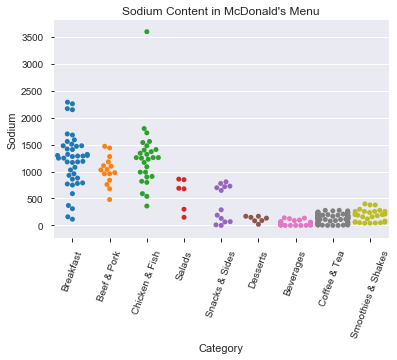

In [9]:
#Categorical Scatterplots
plot=sns.swarmplot(x="Category", y="Sodium", data=data)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title("Sodium Content in McDonald's Menu")
plt.show()

- Finding the maximum sodium content

In [10]:
data['Sodium'].describe()

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: Sodium, dtype: float64

- Getting the index of food item to locate Item name

In [11]:
data['Sodium'].idxmax()

82

- Chicken Nuggets contains maximum sodium - 3600

In [12]:
data.at[82,'Item']

'Chicken McNuggets (40 piece)'

- Checking the relation betwen Protein and Total_Fat

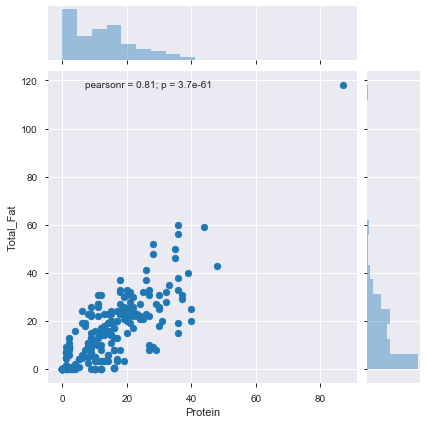

In [13]:
plot=sns.jointplot(x="Protein", y="Total_Fat", data=data)
plot.annotate(stats.pearsonr)

- Checking the outliers in Sugar by plotting boxplot

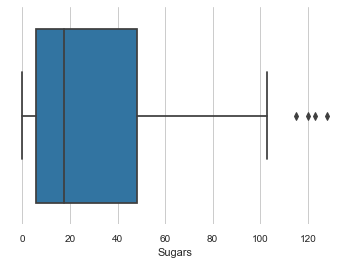

In [14]:
plot = sns.set_style("whitegrid")
sns.boxplot(x=data['Sugars'])

- Finding the correlation between variables

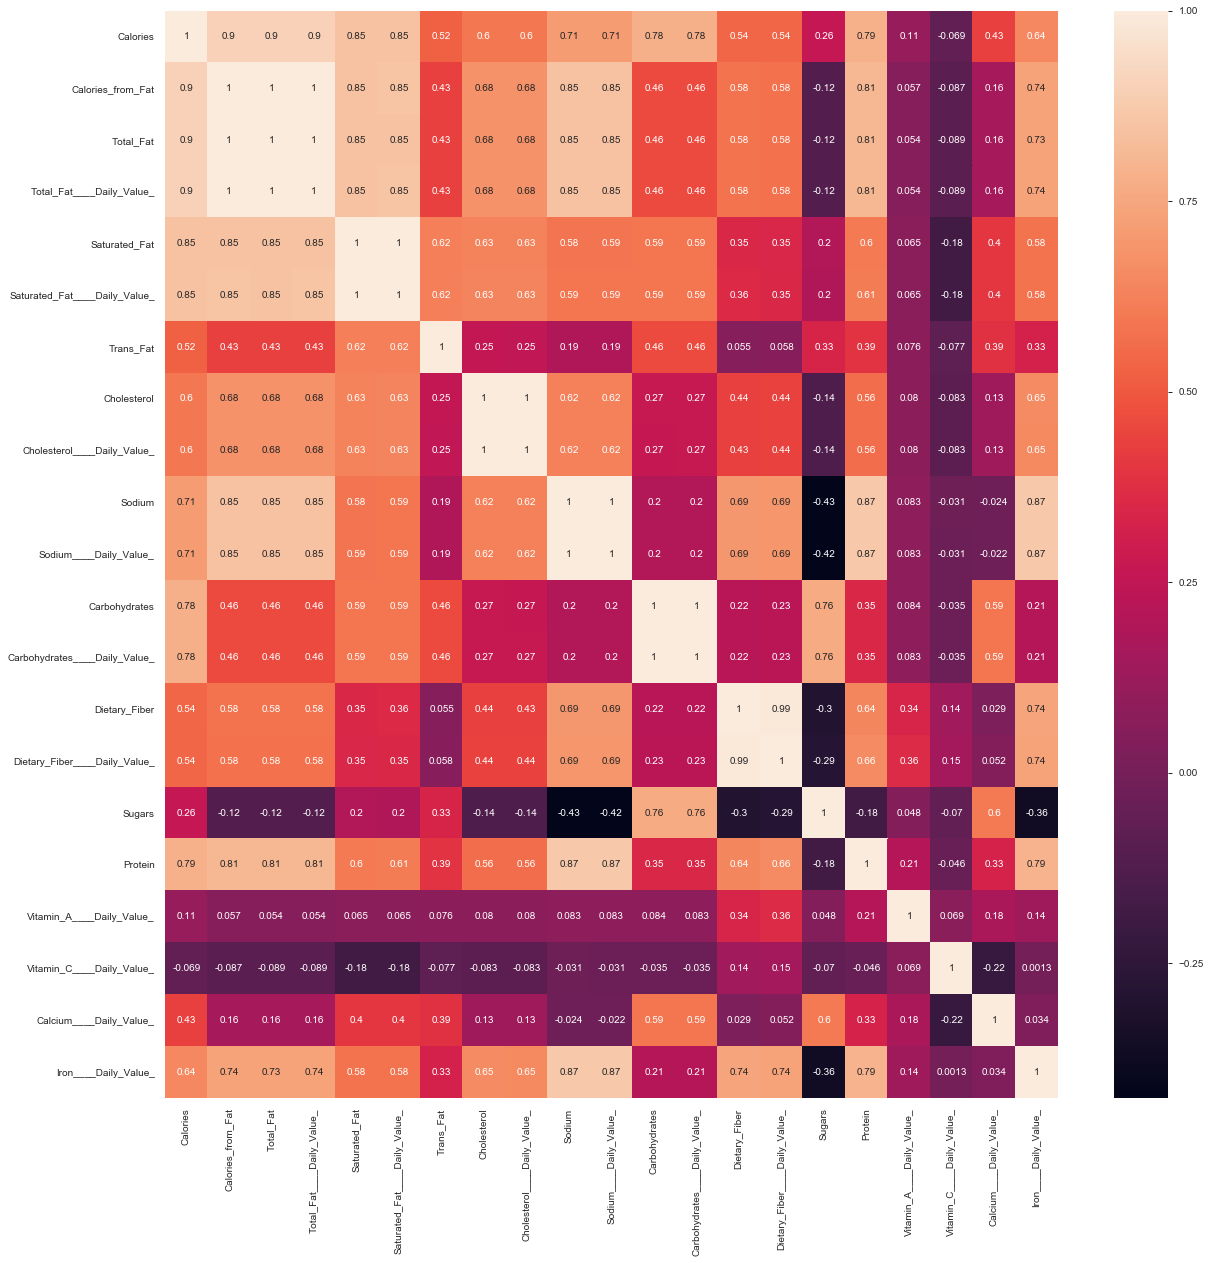

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

- Using pandas profiling for basic data analysis

In [16]:
pp.ProfileReport(data)